In [1]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'
import ete3
from ete3 import Tree, TreeStyle, NodeStyle, faces, SeqMotifFace, TextFace, CircleFace
import pandas as pd
import urllib.request
from pathlib import Path


In [2]:
output_dir = "figs"

In [3]:
for f,url in (("../data/Round2_pre-test_SOD_results.tsv", "https://zenodo.org/record/7688668/files/Round2_pre-test_SOD_results.tsv"),
              ("../data/CuSOD_round2_pre-test.newick", "https://zenodo.org/record/7688668/files/CuSOD_round2_pre-test.newick"),
              ("../data/FeSOD_round2_pre-test.newick", "https://zenodo.org/record/7688668/files/FeSOD_round2_pre-test.newick")):
    
    if not Path(f).exists():
        urllib.request.urlretrieve(url, f)


SOD_data = pd.read_table("../data/Round2_pre-test_SOD_results.tsv", index_col=0)

In [4]:
circle_size = 10
colors = {"FeSOD":"Blue", "CuSOD_never_signal":"Blue", "Control":"Black", "CuSOD_clipped_signal":"Green"}
rename = {"E_Coli_SOD": "E. coli sodB", "potentilla_atrosanguinea_SOD":"paSOD", "homo_sapiens_SOD_1":"hSOD"}
def SOD_layout(node, data, ):
    if node.is_leaf():
        row = data.loc[node.name]

        
        faces.add_face_to_node(TextFace(rename.get(node.name, node.name), fgcolor=colors[row["SOD group"]]), node, column=0, aligned=False)
        faces.add_face_to_node(TextFace(" " + row["SOD group"] + " ", fgcolor=colors[row["SOD group"]]), node, column=1, aligned=True)
        faces.add_face_to_node(TextFace(" " + row["Superkingdom"] + " ", fgcolor=colors[row["SOD group"]]), node, column=2, aligned=True)
        
        column = 3

        expression_size = 0
        if row["Expression"] == "Y":
            expression_size = circle_size
        faces.add_face_to_node(CircleFace(expression_size, "light blue"), node, column=column, aligned=True)
        column += 1
        
        solubility_size = 0
        if row["Soluble"] == "Y":
            solubility_size = circle_size
        faces.add_face_to_node(CircleFace(solubility_size, "silver"), node, column=column, aligned=True)
        column += 1
        
        # purified_size = 0
        # if row["Purification"] == "Y":
        #     purified_size = circle_size
        # faces.add_face_to_node(CircleFace(purified_size, "pink"), node, column=column, aligned=True)
        # column += 1
        
        activity_size = 0
        if row["Activity"] == "Y":
            activity_size = circle_size
        faces.add_face_to_node(CircleFace(activity_size, "plum"), node, column=column, aligned=True)
        column += 1
        


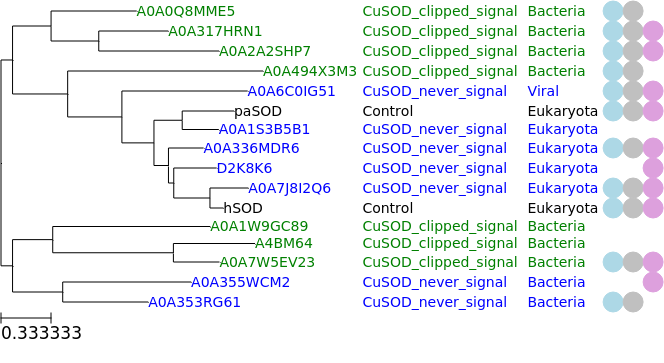

In [5]:
t = ete3.Tree("../data/CuSOD_round2_pre-test.newick")

# Calculate the midpoint node
midpoint = t.get_midpoint_outgroup()

# Set midpoint as outgroup.
t.set_outgroup(midpoint)

ns = NodeStyle()
ts = TreeStyle()
ts.scale = 150
ts.show_leaf_name = False
ts.layout_fn = lambda x: SOD_layout(x, SOD_data)


ns["size"] = 0

for n in t.traverse():
    n.set_style(ns)

    
t.render("%%inline", tree_style=ts)

#t.render(f"{output_dir}/CuSOD_round2_pre-test_tree.png", tree_style=ts)


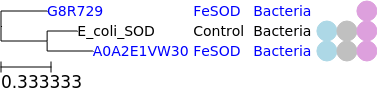

In [6]:
t = ete3.Tree("../data/FeSOD_round2_pre-test.newick")
# Calculate the midpoint node
midpoint = t.get_midpoint_outgroup()

# Set midpoint as outgroup.
t.set_outgroup(midpoint)


ns = NodeStyle()
ts = TreeStyle()
ts.scale = 150
ts.show_leaf_name = False
ts.layout_fn = lambda x: SOD_layout(x, SOD_data)
#ts.mode = "c"

ns["size"] = 0

for n in t.traverse():
    n.set_style(ns)

    
t.render("%%inline", tree_style=ts)

#t.render(f"{output_dir}/FeSOD_round2_pre-test_tree.png", tree_style=ts)